In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [49]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Finding null values in a dataframe

In [50]:
# percentage of nulls in each column
df.isnull().sum() / len(df) * 100 

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [51]:
# dropping columns with nulls > 15%

df = df.drop(['last_review','reviews_per_month'],axis=1)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


# Encoding

Converting the categorical data to numerical data

In [52]:
print(df['neighbourhood_group'].unique())
print(df['room_type'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Private room' 'Entire home/apt' 'Shared room']


In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['neighbourhood_group_encoded'] = le.fit_transform(df['neighbourhood_group'])
df['room_type_encoded'] = le.fit_transform(df['room_type'])

In [54]:
# For neighbourhoods I am first grouping by neighbourhood groups and then performing label encoding
# Eg : Kensington will be 1-1 (Brookyln - kensington)
 
df['neighbourhood_encoded'] = df.groupby('neighbourhood_group')['neighbourhood'].transform(lambda x: le.fit_transform(x) + 1)
df['neighbourhood_final'] = df['neighbourhood_group_encoded'].astype('str') + ' - ' + df['neighbourhood_encoded'].astype(str)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_encoded,room_type_encoded,neighbourhood_encoded,neighbourhood_final
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,1,1,32,1 - 32
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,2,0,18,2 - 18
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,2,1,11,2 - 11
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,1,0,14,1 - 14
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,2,0,5,2 - 5


# Histograms

C:\Users\Aditya Sai\AppData\Local\Temp\ipykernel_21980\2985516852.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=neighbourhood_group_counts.index, y=neighbourhood_group_counts.values, palette='viridis')


<Figure size 1000x600 with 0 Axes>

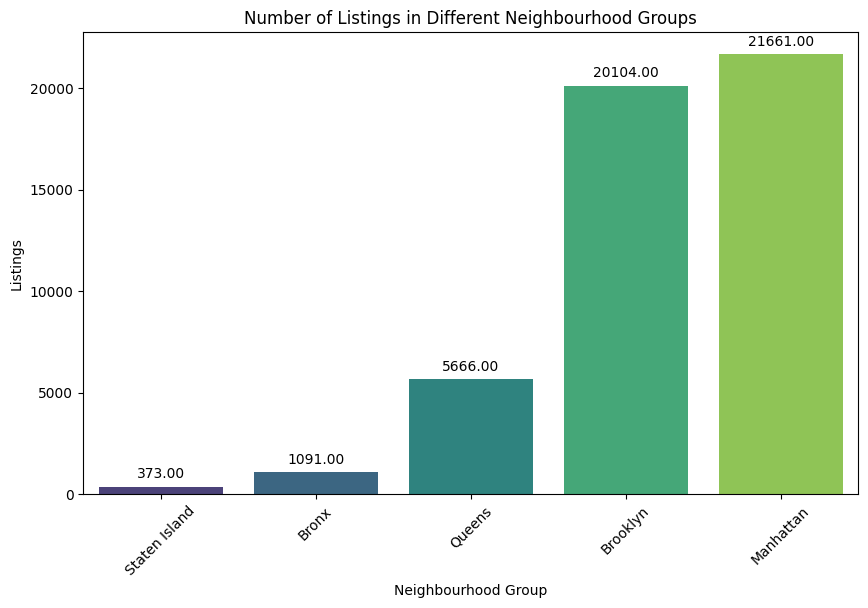

In [55]:
neighbourhood_group_counts = df['neighbourhood_group'].value_counts().sort_values()
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=neighbourhood_group_counts.index, y=neighbourhood_group_counts.values, palette='viridis')

# Adding the text on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.title('Number of Listings in Different Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Listings')
plt.xticks(rotation=45)  
plt.show()

In [56]:
(df.groupby(['neighbourhood_group'])['price'].mean())

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

C:\Users\Aditya Sai\AppData\Local\Temp\ipykernel_21980\1797972277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=neighbourhood_group_avg.index, y=neighbourhood_group_avg.values, palette='viridis')


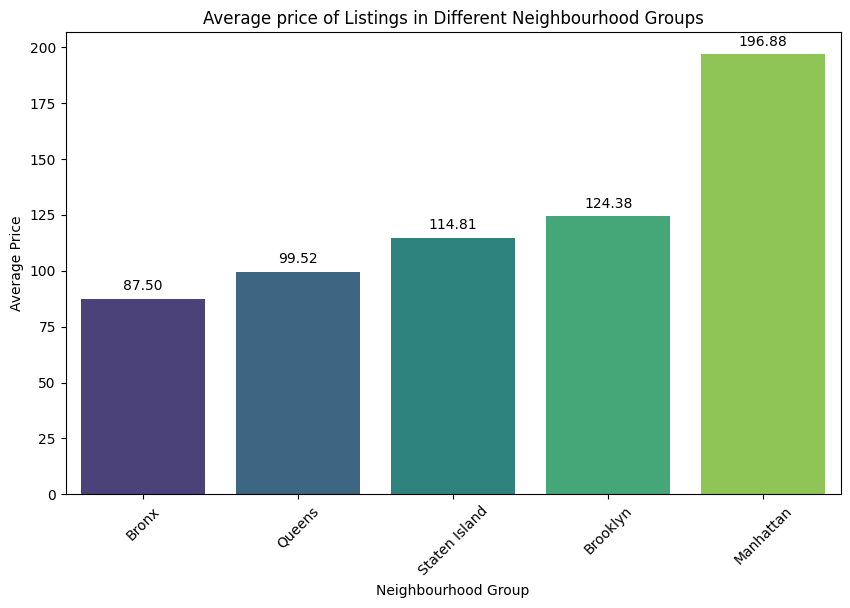

In [57]:
neighbourhood_group_avg = (df.groupby(['neighbourhood_group'])['price'].mean()).sort_values()
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=neighbourhood_group_avg.index, y=neighbourhood_group_avg.values, palette='viridis')

# Adding the text on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.title('Average price of Listings in Different Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  
plt.show()

C:\Users\Aditya Sai\AppData\Local\Temp\ipykernel_21980\1899446177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=room_type_avg.index, y=room_type_avg.values, palette='viridis')


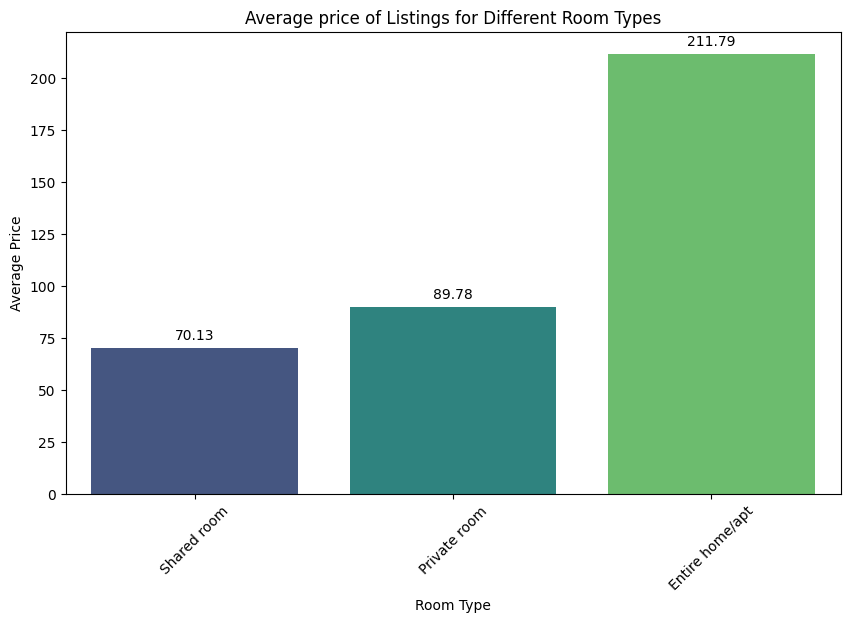

In [60]:
room_type_avg = (df.groupby(['room_type'])['price'].mean()).sort_values()
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=room_type_avg.index, y=room_type_avg.values, palette='viridis')

# Adding the text on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.title('Average price of Listings for Different Room Types')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  
plt.show()

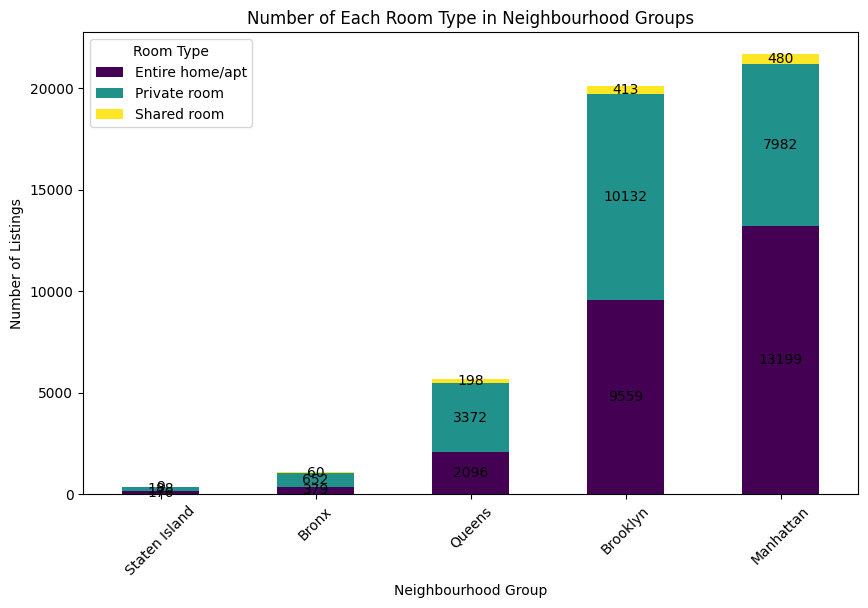

In [66]:
room_type_counts = df.groupby(['neighbourhood_group', 'room_type']).size().unstack(fill_value=0)
room_type_counts['Total'] = room_type_counts.sum(axis=1)
room_type_counts = room_type_counts.sort_values('Total').drop(columns='Total')
ax = room_type_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, 
            y + height/2, 
            '{:.0f}'.format(height), 
            ha='center', 
            va='center')

plt.title('Number of Each Room Type in Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()
